# 탐색적 데이터 분석 (EDA)
- 존 투키에 의해서 1970년대에 정립
- 요약통계와 함께 데이터 집합을 그림으로 표현하여 데이터를 분석하는 기법

## 기초 통계
- 평균, 중앙값 등의 계산은 numpy, scipy.stats 모듈을 이용
- pandas는 파일을 읽는 등의 작업에 사용

# 참고문헌
- https://github.com/gedeck/practical-statistics-for-data-scientists


In [78]:

# pandas - 테이블 형태 데이터 처리에 적합한 자료구조(DataFrame, Series)를 제공
# numpy + RDB 같은 유연한 데이터 처리 기능
import pandas as pd

# state.csv 파일 읽어오기
state = pd.read_csv("state.csv")
print(state.head())
print(state.describe())

type(state) # pandas.core.frame.DataFrame


        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA
         Population  Murder.Rate
count  5.000000e+01    50.000000
mean   6.162876e+06     4.066000
std    6.848235e+06     1.915736
min    5.636260e+05     0.900000
25%    1.833004e+06     2.425000
50%    4.436370e+06     4.000000
75%    6.680312e+06     5.550000
max    3.725396e+07    10.300000


pandas.core.frame.DataFrame

In [79]:

# 산술평균(mean)
print(f'산술평균 : {state["Population"].mean()}')

# scipy - 사이파이, 과학 계산 컴퓨팅 영역에서 사용하는 모듈
# scipy는 여러개의 패키지로 구분됨
# scipy.integrate, scipy.linalg, scipy.optimized 등
from scipy import stats

# 절사평균 (trimmed mean) - 정해진 수의 극단값을 제외한 나머지 값의 평균
# 극단값(이상치) - extreme value
# 극단값 삭제후 평균 계산 => 0.1은 각각 끝에서 10% 총 20%를 절사한다는 의미
print(f'절사평균 : {stats.trim_mean(state["Population"], 0.1)}')

# numpy = numerical python의 약자
# 내부 알고리즘은 C로 작성되서 다른 오버헤드없이 바로 메모리 접근
# 메모리도 적게 사용하고, 시간도 빠른 특징이 있음
import numpy as np
# 중앙값
np.median(state['Population'])



산술평균 : 6162876.3
절사평균 : 4783697.125


4436369.5

표준편차 : 6848235.347401142
표준편차 : 6848235.347401142
1사분위수 : 1833004.25
2사분위수 : 4436369.5
3사분위수 : 6680312.25
         Population  Murder.Rate
count  5.000000e+01    50.000000
mean   6.162876e+06     4.066000
std    6.848235e+06     1.915736
min    5.636260e+05     0.900000
25%    1.833004e+06     2.425000
50%    4.436370e+06     4.000000
75%    6.680312e+06     5.550000
max    3.725396e+07    10.300000


Text(0, 0.5, 'Population(million)')

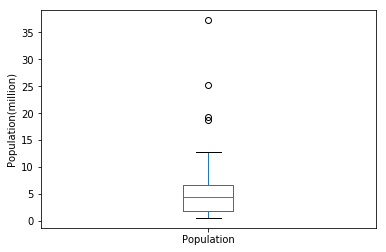

In [80]:
# 산포도(dispersion)
# 편차 - 평균과 위치추정값의 차이 = 잔차, 오차
# 분산 - 편차 제곱합의 평균
# 표준편차 - 분산의 양의 제곱근
# 범위 - 최대값과 최소값의 차이
print(f'표준편차 : {state["Population"].std()}')
print(f"표준편차 : {state['Population'].std()}")
      
print(f"1사분위수 : {state['Population'].quantile(0.25)}")
print(f"2사분위수 : {state['Population'].quantile(0.50)}")
print(f"3사분위수 : {state['Population'].quantile(0.75)}")
      
np.median(state['Population'])
      
# 사분위수 확인
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
      
# 통계 요약치 확인(pandas 이용)      
print(f"{state.describe()}")

# boxplot
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(million)')
      
      


Text(0.5, 0, 'Population(million)')

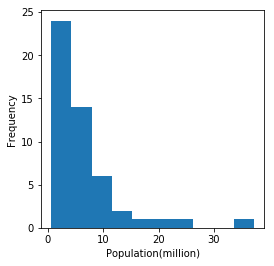

In [81]:

# histogram
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population(million)')